# The Battle of the Neighborhoods - A clustering approach to understanding business popularity in London.



## Table of Contents

[1. Introduction: Business Problem](#intro)

[2. Data](#data)

[3. Methodology](#meth)

[4. Results and Discussion](#resu)

[5. Conclusion](#conc) 


 <a id='intro'></a> 

## 1. Introduction: Business Problem

London is one of the world's leading tourism destinations, and the city is home to an array of famous tourist attractions. This city is widely known for its vast selection of wonderful places, not only on the weekends but also during the weekdays. Even with hundreds of such venues all across the city, there are abundant opportunities for investors to choose from. Understanding the attributes of these popular places might give investors an idea of some business opportunities in a certain area of London. 
In other to select the best business opportunity, optimal location coupled with the understanding of the environment is required. Hence, this research employed the used a clustering method in categorising all the boroughs in London and going further in analysing top common places in each cluster based on their popularity, hence giving investors a glance at the wide variety of top business selections for different areas and less popular ones with possibilities of doing well in all the areas. Also, tourist can use this analysis in understanding areas to visit in London based on their interest.

[1] https://en.wikipedia.org/wiki/List_of_London_boroughs

 <a id='data'></a> 

## 2. Data

Based on the definition of our research problem, we have scraped and filtered the London Borough's data from Wikipedia [1], the extracted columns are the names, population and land area of all London’s borough. Also, the package Google Maps API reverse geocoding was used in matching both latitude and longitude of each borough to the data and lastly the Foursquare API was employed in obtaining top common venues for all the boroughs.

 <a id='meth'></a> 

## 3. Methodology  

Note: head denotes the first five rows of a dataframe.

###             3.1 Dataframe


Initial data extraction from Wikipedia page was done using the BeautifulSoup and lxlm packages in python and the resulting data head is shown in [Fig 1](#fig1). Only three columns were extracted from the resulting table - the Borough, Area and Population which was filter into a new dataframe.

In matching latitude and longitude of corresponding boroughs, the geocoder API was used. The resulting dataframe head is shown in [Fig 2](#fig2). [Fig 3](#fig3) presents the merging of the two data frames and an addition of a new column, population density which was calculated using below. 

The resulting coordination (latitude and longitude) of each borough was superimposed on the London’s map as seen in [Fig 4](#fig4). This was done by using the geocoder API to obtain the latitude and longitude of London and plotting the map using Folium package in python and thereafter adding a circular marker of each borough’s coordination on the map. This visualisation shows that the boroughs are well located on the map with an acceptable approximation.


### 3.2.	Venues extraction


In this section the top venues for all the boroughs were extracted using the Foursquare API, the boroughs from the dataframe in the previous section were fed into the API and the resulting data is a (3100, 7) dataframe presented in [Fig 5](#fig5) denoting that the API returned 100 venues categories for each of the boroughs.

The dataframe in [Fig 5](#fig5) was processed to allow for easy usage, these stages involve one-hot encoding and moving the venues categories to the first column of the dataframe and finally grouping all the venues categories by frequency of occurrence in each borough. The resulting data is shown in [Fig 6](#fig6), with five most common venues but 10 most common places were used in the data analysis to allow for extended robustness.

 <a id='resu'></a> 

## 4. Results and Discussion

### 4.1. Clustering 


In this project, the K-means algorithm was used in categorising the boroughs into different clusters. A cluster refers to a collection of data points aggregated together because of certain similarities. Therefore, this algorithm will segment boroughs based on certain detected features in the data. This algorithm required the initialisation of n-number of clusters, several numbers were tested but n = 3 was chosen as it gives a unique clustering when visualised.

[Fig 7](#fig7) presents the resulting clustering obtained using K-means, an interesting segmentation was observed. The boroughs in central London were clustered together – coloured green, and the boroughs to the left (west) and right(east) were also clustered together – coloured red. Similarly, the boroughs to the top (North) and bottom (South) were clustered together – coloured purple. 

### 4.2. Population Density

In understanding the relationship of clusters in [Fig 7](#fig7), the population density is plotted as seen in [Fig 8](#fig8). This shows that the cluster 1 (left and right of central - red) boroughs are majorly in the mid bound of the population density, the second cluster (top and bottom of central – purple) with population density at the lower band, while the third cluster ( central - green) are mostly in the top bound of the population density. This observation might be as a result of central London having lots of economic activities and people tends to live closer to such areas. This such shows a correlation between the population density and the clustering achieved by K-means as it was trained using the data obtained from foursquare and not Wikipedia data.

### 4.3 Venue Analysis

The three clusters have some unique attributes relating to the venue categories obtained from the foursquare API. In understanding these unique attributes, we used a visualization method called WordCloud. WordCloud is an image composed of words, in which each word sizes represent its frequency or importance. In this research, all the venues for each cluster were extracted from the dataframe and plotted on the WordCloud using their frequencies, such that the font size of the words is a function of their frequencies i.e. The higher the frequency, the bigger the word and vice versa.
[Fig 9](#fig9) presents the result for cluster 1, it shows that the most population density of the boroughs falls within the mid-range. The frequency of venues is majorly café, pub and park with a vast distribution of fewer others such as restaurants of different kinds, beer bar and gym. These less distributed venues provide a potential opportunity which will require further analyses. 
[Fig 10](#fig10) presents the result for cluster 2, the most population density of the boroughs falls within the lower band. Also, Pub is the major common venue at this cluster followed closely by the coffee shop, restaurant, grocery store and supermarket. Less common are bar, department store and bakery. And lastly, in the last clustering, hotel, park, bakery and coffee shops are the most common while the least in these zones are the gym, bar and restaurants. The observed result might be due to socio-economic factors such as house prices, population distribution, activities in the zones and income distribution. For instance, property rents are usually high in central London resulting in less occurrence of small businesses such as bars, pubs and gym. 

 <a id='conc'></a> 

## 5. Conclusion

This research has explored common venues and businesses in different clusters of London boroughs, achieved using the k-means clustering of all the boroughs in London. Three clusters were used, resulting in the segmentation of boroughs into three different groups with unique similarities. It was observed that the groups have a relationship with the population density of the region i.e. each of the three clusters mostly belong to low, mid or high population density. Using the data obtained from the foursquare API of the popular place, it was also observed that the popularity of venues in each cluster was uniquely matching to the characteristics observed in the region. This will give both investor and tourists a glance of business opportunities and visiting places for different zones in London. Even though this research has suggested some business idea, it is limited as an optimal location with a very good approximation is needed. Therefore, further research is needed to investigation exact location of setting the suggested businesses in each zone.

# CODE BELOW

## Importing all the required packages

In [24]:
import numpy as np 

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge geocoder --yes
from geopy.geocoders import Nominatim
import geocoder

import requests
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

from sklearn.cluster import KMeans

#!conda install -c conda-forge folium --yes
import folium 

#!conda install -c conda-forge lxml --yes
import lxml.html as lh 
import urllib.request

#!conda install -c anaconda beautifulsoup4 --yes
from bs4 import BeautifulSoup

#!conda install -c conda-forge wordcloud --yes
from wordcloud import WordCloud, STOPWORDS

print('Libraries imported.')

Libraries imported.


## Data scraping from Wikipedia

In [25]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(url,'lxml')
table = soup.find('table')
df_r = pd.read_html(str(table))
data = pd.read_json(df_r[0].to_json(orient='records'))
data = data.iloc[1:]

<a id="fig1"></a>

In [26]:
data.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
1,Barnet,None,None,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,None,None,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,None,None,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,None,None,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,None,None,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,270029,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11


## Data preprocessing

In [27]:
new_data = data.iloc[:,[0,6,7]]
new_data.columns = ['Borough', 'Area', 'Population']
density = new_data['Population']/new_data['Area']
new_data = new_data.assign(Density=density.values)
new_data['Borough'] = new_data['Borough'].str.replace('\[note 2]', '')
new_data['Borough'] = new_data['Borough'].str.replace('\[note 4]', '')
new_data['Borough'] = new_data['Borough'].str.replace(' +$', '', regex = True)

## Getting the coordinate data

In [28]:
column_names = ['Borough','Latitude', 'Longitude'] 
co_ord = pd.DataFrame(columns=column_names)
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
for i in range(1,32):
    city = new_data['Borough'][i]
    location = geolocator.geocode(city + " UK")
    lat = location.raw["lat"]
    long = location.raw["lon"]
    co_ord = co_ord.append({'Borough':location, 'Latitude': lat,'Longitude': long}, ignore_index=True)
print(co_ord.shape)

(31, 3)


<a id="fig2"></a>

In [29]:
co_ord.head()

,Borough,Latitude,Longitude
0,"(Chipping Barnet, London, Greater London, Engl...",51.65309,-0.2002261
1,"(Bexley, London Borough of Bexley, London, Gre...",51.4416793,0.150488
2,"(The Brent, Dartford, Kent, South East, Englan...",51.4420262,0.2315227
3,"(Bromley, London, Greater London, England, BR1...",51.4028046,0.0148142
4,"(Camden Town, London, Greater London, England,...",51.5423045,-0.1395604


<a id="fig3"></a>

In [32]:
#Merging the data frame and correcting the wrong coordinates
new_data["Latitude"] = co_ord.iloc[:,1].astype(float).values
new_data["Longitude"] = co_ord.iloc[:,2].astype(float).values
new_data.at[28, 'Latitude'] = 51.5203
new_data.at[28, 'Longitude'] = 0.0293
new_data.at[29, 'Latitude'] = 51.5886
new_data.at[29, 'Longitude'] = 0.0118
new_data.head()

,Borough,Area,Population,Density,Latitude,Longitude
1,Barnet,33.49,395896,11821.319797,51.653090,-0.200226
2,Bexley,23.38,248287,10619.632164,51.441679,0.150488
3,Brent,16.70,329771,19746.766467,51.442026,0.231523
4,Bromley,57.97,332336,5732.896326,51.402805,0.014814
5,Camden,8.40,270029,32146.309524,51.542305,-0.139560


## Verifying the coordinates on a map

In [34]:
#Accessing London's coordinate
address = 'London, UK'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))
map_london = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for lat, lng, label in zip(new_data['Latitude'], new_data['Longitude'], new_data['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)

The geograpical coordinate of London are 51.5073219, -0.1276474.


<a id="fig4"></a>

In [36]:
map_london

## Extracting the Top Venues from Foursquare

In [39]:
CLIENT_ID = 'LWSCQ2P00NUQ4LET3V51GVNIK4R4NFS3C0NWBZ0QYPLVT4R2' # your Foursquare ID
CLIENT_SECRET = 'YO55MQ0KYRQBKHLTWA35LSTD1MUUM05PJJ4UXUHY5VWCOVX3' # your Foursquare Secret
VERSION = '20210205' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LWSCQ2P00NUQ4LET3V51GVNIK4R4NFS3C0NWBZ0QYPLVT4R2
CLIENT_SECRET:YO55MQ0KYRQBKHLTWA35LSTD1MUUM05PJJ4UXUHY5VWCOVX3


In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

london_venues = getNearbyVenues(names=new_data['Borough'],
                                   latitudes=new_data['Latitude'],
                                   longitudes=new_data['Longitude']
                                  )

Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


<a id="fig5"></a>

In [51]:
print(london_venues.shape)
london_venues.head()

(3098, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barnet,51.65309,-0.200226,Ye Old Mitre Inne,51.652940,-0.199507,Pub
1,Barnet,51.65309,-0.200226,The Black Horse,51.653075,-0.206719,Pub
2,Barnet,51.65309,-0.200226,Everyman Cinema,51.646793,-0.187675,Movie Theater
3,Barnet,51.65309,-0.200226,Joie de Vie,51.653659,-0.201288,Bakery
4,Barnet,51.65309,-0.200226,Caffè Nero,51.654861,-0.201743,Coffee Shop


## Venue's Data preprocessing

In [59]:
london_venues.groupby('Borough').count()
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")
# add Borough column back to dataframe
london_onehot['Borough'] = london_venues['Borough'] 
# move Borough column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]
print(london_onehot.shape)
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
print(london_grouped.shape)

There are 235 uniques categories.
(3098, 236)
(31, 236)


In [62]:
num_top_venues = 10

for hood in london_grouped['Borough']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barnet----
                venue  freq
0                 Pub  0.13
1         Coffee Shop  0.12
2                Café  0.06
3                Park  0.05
4  Italian Restaurant  0.05
5         Supermarket  0.04
6       Grocery Store  0.04
7              Bakery  0.04
8         Golf Course  0.03
9  Turkish Restaurant  0.03


----Bexley----
                  venue  freq
0                   Pub  0.16
1         Grocery Store  0.13
2           Coffee Shop  0.08
3           Supermarket  0.07
4              Pharmacy  0.05
5                  Park  0.05
6        Clothing Store  0.04
7                 Hotel  0.04
8  Gym / Fitness Center  0.03
9    Italian Restaurant  0.03


----Brent----
                  venue  freq
0           Coffee Shop  0.08
1                   Pub  0.08
2        Clothing Store  0.08
3         Grocery Store  0.08
4              Pharmacy  0.05
5          Burger Joint  0.04
6    Italian Restaurant  0.03
7  Fast Food Restaurant  0.03
8           Supermarket  0.03
9      Departm

In [64]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

<a id="fig6"></a>

In [65]:
boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,Pub,Coffee Shop,Café,Italian Restaurant,Park,Supermarket,Grocery Store,Bakery,Turkish Restaurant,Golf Course
1,Bexley,Pub,Grocery Store,Coffee Shop,Supermarket,Pharmacy,Park,Hotel,Clothing Store,Italian Restaurant,Gym / Fitness Center
2,Brent,Grocery Store,Coffee Shop,Pub,Clothing Store,Pharmacy,Burger Joint,Italian Restaurant,Supermarket,Department Store,Fast Food Restaurant
3,Bromley,Coffee Shop,Pub,Grocery Store,Park,Gym / Fitness Center,Pizza Place,Indian Restaurant,Supermarket,Café,Mediterranean Restaurant
4,Camden,Hotel,Park,Coffee Shop,Pub,Indian Restaurant,Pizza Place,Garden,Market,Bakery,French Restaurant


## Clustering using K-means

In [66]:
# setting number of clusters = 3
kclusters = 3
london_grouped_clustering = london_grouped.drop('Borough', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 2, 1, 0, 1, 0, 0], dtype=int32)

In [67]:
# add clustering labels
boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
london_merged = new_data
london_merged = london_merged.join(boroughs_venues_sorted.set_index('Borough'), on='Borough')

In [68]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color= 'black',
        fill_opacity= 0.5).add_to(map_clusters)

<a id ="fig7"></a> 

In [70]:
map_clusters

In [74]:
#setting each cluster to a variable
london_cluster_1 = london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]
london_cluster_2 = london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]
london_cluster_3 = london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

In [75]:
#formatting new dataframe for vuisualisation
new_clus = london_merged.iloc[:, 6:17]
df3 = pd.concat([new_data,new_clus], axis=1)
df_density = df3.sort_values('Density')
df_cluster = df3.sort_values('Cluster Labels')

## Population Density

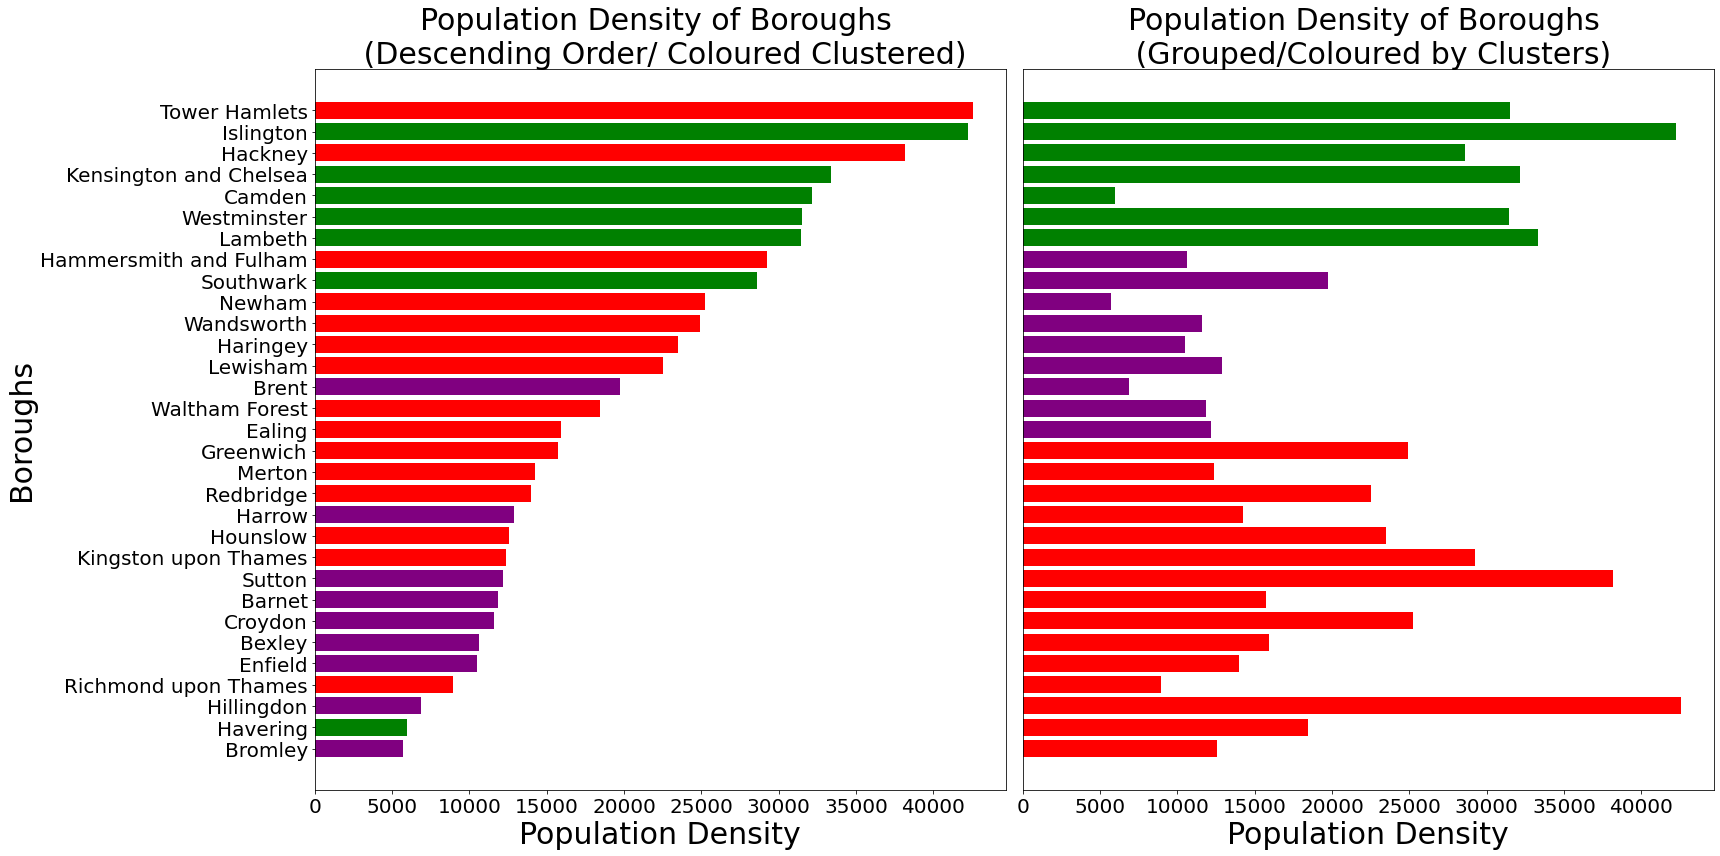

In [77]:

clrs = ['red' if (t == 0) else 'purple' if (t == 1) else 'green' for t in df_density['Cluster Labels']]
clr = ['red' if (t == 0) else 'purple' if (t == 1) else 'green' for t in df_cluster['Cluster Labels']]

ax = df_density['Density']
ay = df_density['Borough']

ax_1 = df_cluster['Density']
ay_1 = df_cluster['Borough']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
axes[0].barh(ay, ax, color = clrs)
axes[1].barh(ay_1, ax_1, color = clr)
axes[0].set_title("Population Density of Boroughs \n (Descending Order/ Coloured Clustered)", fontsize=30)
axes[1].set_title("Population Density of Boroughs \n (Grouped/Coloured by Clusters)", fontsize=30)

axes[0].set_ylabel('Boroughs', fontsize=30)
axes[0].set_xlabel('Population Density',  fontsize=30)
axes[1].set_xlabel('Population Density',  fontsize=30)
axes[1].get_yaxis().set_visible(False)

for label in (axes[0].get_yticklabels()+ axes[0].get_xticklabels() + axes[1].get_xticklabels()):
    label.set_fontsize(20)
         
fig.tight_layout()
fig.savefig('density.png')

<a id="fig8"> </a>

In [79]:
#extracting all words from each cluster
df_word_1 = london_cluster_1.iloc[:, 3:13]
fd_1 = pd.concat([df_word_1, df_word_1.unstack().reset_index(drop=True).rename('All words')], axis=1)
word_1 = '+ '.join([i for i in fd_1['All words']])

df_word_2 = london_cluster_2.iloc[:, 3:13]
fd_2 = pd.concat([df_word_2, df_word_2.unstack().reset_index(drop=True).rename('All words')], axis=1)
word_2 = '+ '.join([str(i) for i in fd_2['All words']])

df_word_3 = london_cluster_3.iloc[:, 3:13]
fd_3 = pd.concat([df_word_3, df_word_3.unstack().reset_index(drop=True).rename('All words')], axis=1)
word_3 = '+ '.join([i for i in fd_3['All words']])

In [80]:
# instantiate a word cloud object
graph_instance = WordCloud(
    background_color='white',
    regexp=r"\w[\w' ]+",
   collocations=False,
   width=3000, height=3000
)

## Results for cluster1

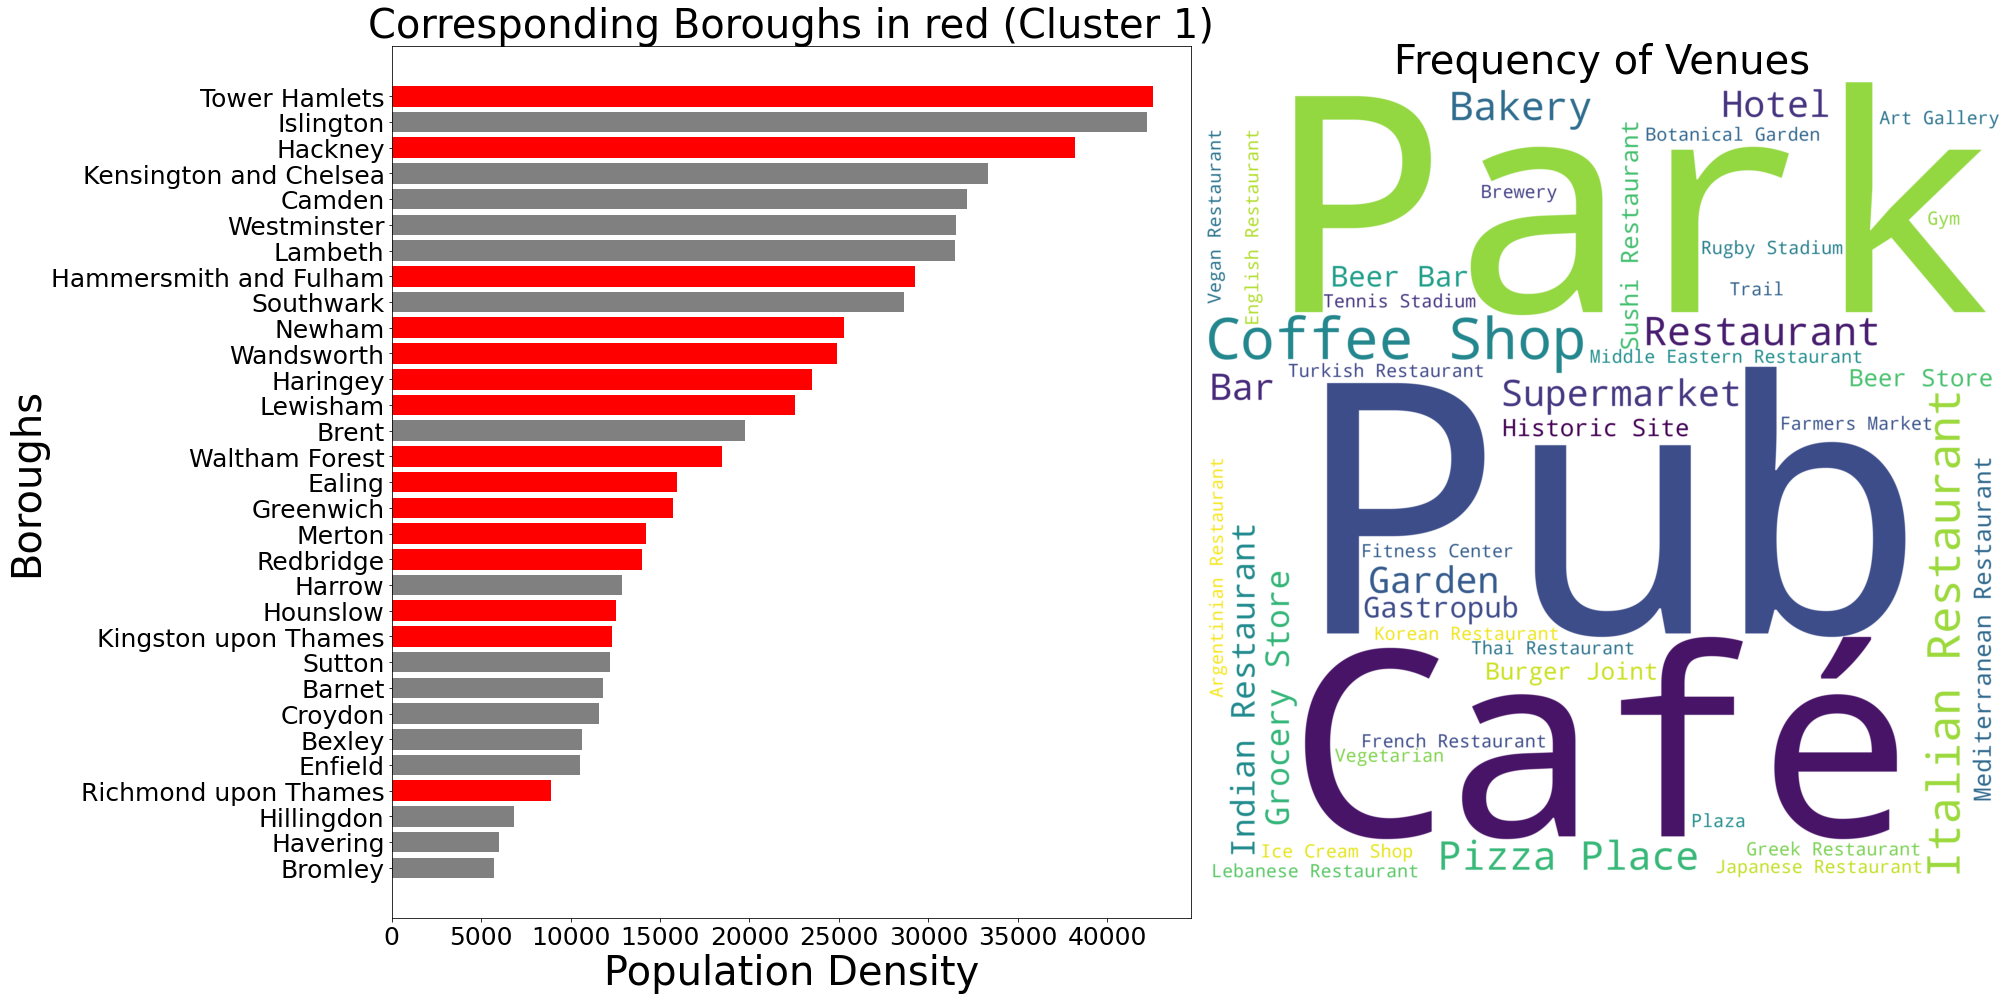

In [81]:
graph_instance.generate(word_1)
clr_1 = ['red' if (t == 0) else 'gray' for t in df_density['Cluster Labels']] 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 14))
ax = df_density['Density']
ay = df_density['Borough']

axes[1].imshow(graph_instance, interpolation='bilinear')
axes[1].axis('off')
axes[0].barh(ay,ax, color=clr_1)
axes[1].set_title("Frequency of Venues", fontsize=40)
axes[0].set_title("Corresponding Boroughs in red (Cluster 1)", fontsize=40)
axes[0].set_ylabel('Boroughs', fontsize=40)
axes[0].set_xlabel('Population Density',  fontsize=40)
for label in (axes[0].get_yticklabels()+ axes[0].get_xticklabels()):
    label.set_fontsize(25)
fig.tight_layout()
fig.savefig("cluster_1.png")

<a id = "fig9"> </a>

## Results for cluster2

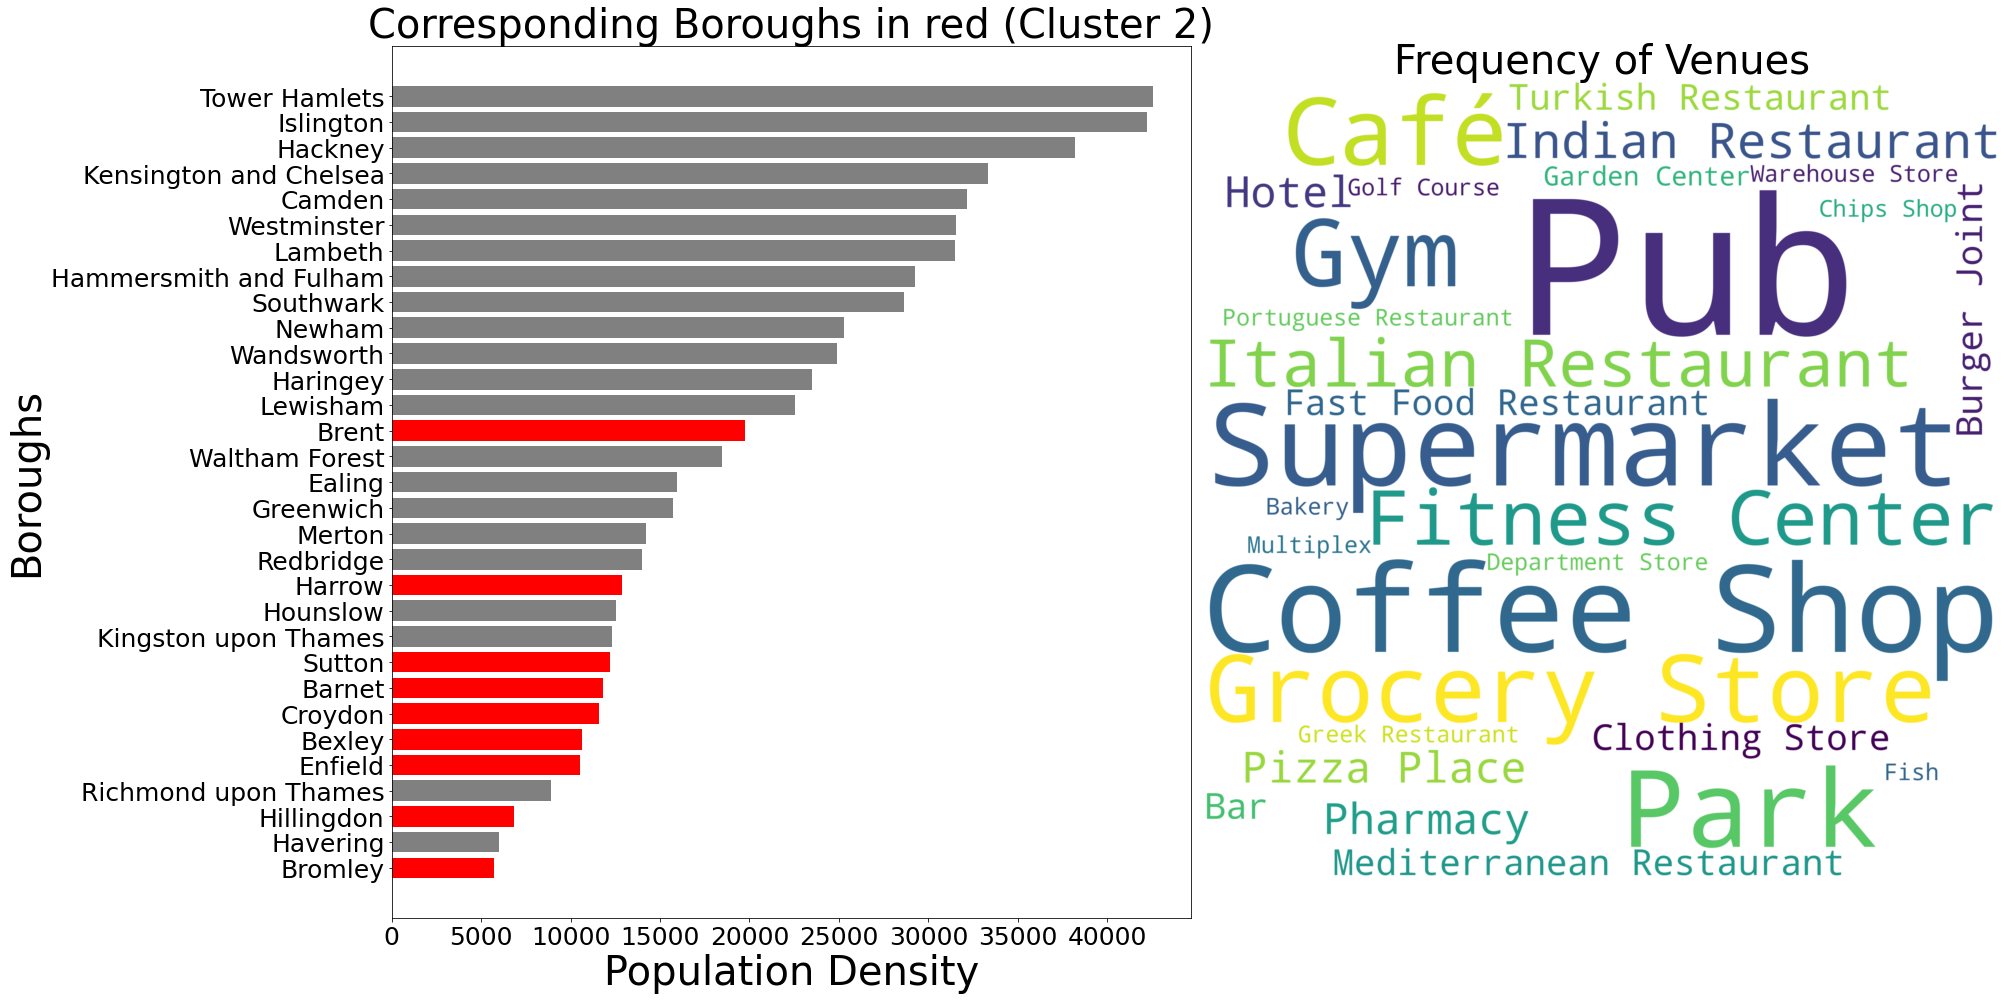

In [85]:
graph_instance.generate(word_2)
clr_2 = ['red' if (t == 1) else 'gray' for t in df_density['Cluster Labels']] 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 14))
ax = df_density['Density']
ay = df_density['Borough']

axes[1].imshow(graph_instance, interpolation='bilinear')
axes[1].axis('off')
axes[0].barh(ay,ax, color=clr_2)
axes[1].set_title("Frequency of Venues", fontsize=40)
axes[0].set_title("Corresponding Boroughs in red (Cluster 2)", fontsize=40)
axes[0].set_ylabel('Boroughs', fontsize=40)
axes[0].set_xlabel('Population Density',  fontsize=40)
for label in (axes[0].get_yticklabels()+ axes[0].get_xticklabels()):
    label.set_fontsize(25)
fig.tight_layout()
fig.savefig("cluster_2.png")

<a id = "fig10"> </a>

## Results for cluster3

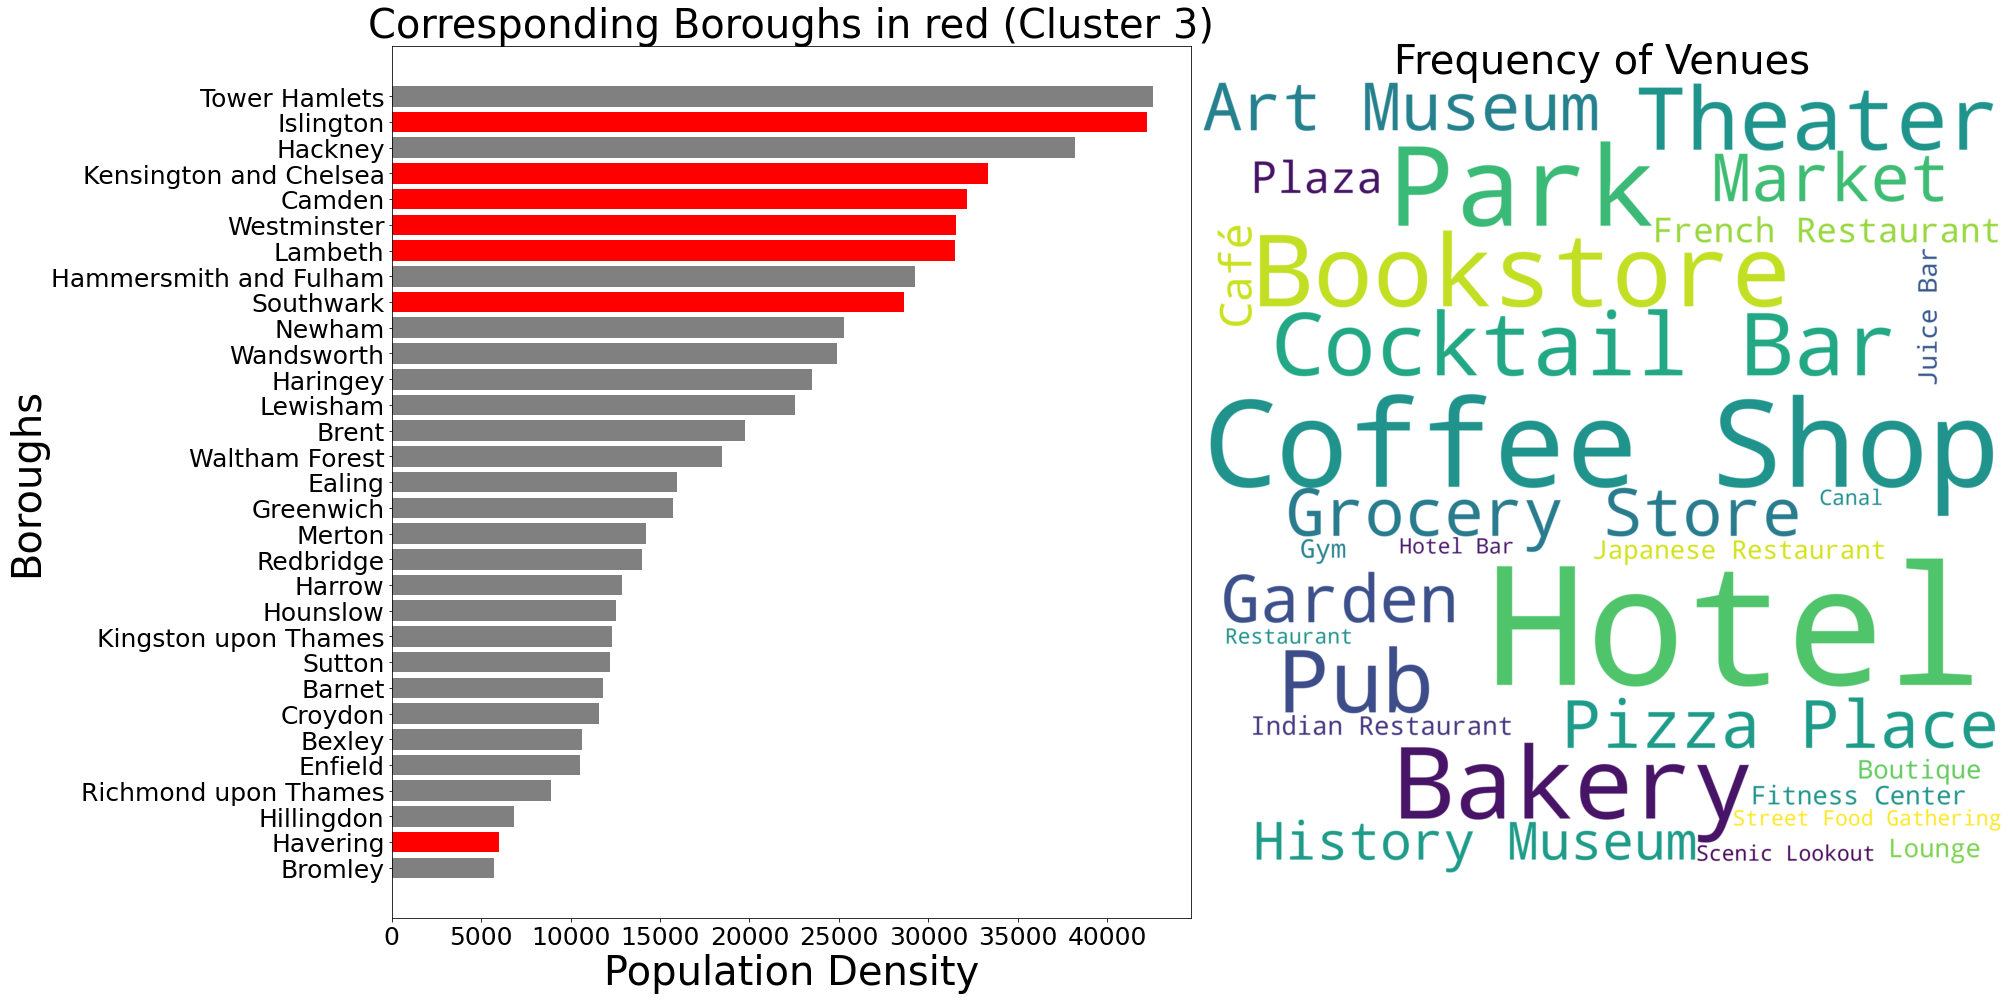

In [86]:
graph_instance.generate(word_3)
clr_3 = ['red' if (t == 2) else 'gray' for t in df_density['Cluster Labels']] 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 14))
ax = df_density['Density']
ay = df_density['Borough']

axes[1].imshow(graph_instance, interpolation='bilinear')
axes[1].axis('off')
axes[0].barh(ay,ax, color=clr_3)
axes[1].set_title("Frequency of Venues", fontsize=40)
axes[0].set_title("Corresponding Boroughs in red (Cluster 3)", fontsize=40)
axes[0].set_ylabel('Boroughs', fontsize=40)
axes[0].set_xlabel('Population Density',  fontsize=40)
for label in (axes[0].get_yticklabels()+ axes[0].get_xticklabels()):
    label.set_fontsize(25)
fig.tight_layout()
fig.savefig("cluster_3.png")

<a id = "fig11"> </a>

<a id = "fig11"></a>

# THANKS